In [8]:
# 导入必要的库
import matplotlib as mpl
import matplotlib.pyplot as plt
# 在Jupyter notebook中内联显示图表
%matplotlib inline  
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
from tqdm.auto import tqdm  # 进度条库
import torch
import torch.nn as nn
import torch.nn.functional as F

# 打印Python版本信息
print(sys.version_info)

# 打印各个库的版本信息
for module in mpl, np, pd, sklearn, torch:
    print(module.__name__, module.__version__)
    
# 设置设备：如果有GPU则使用GPU，否则使用CPU
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)


sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)
matplotlib 3.10.0
numpy 1.26.4
pandas 2.2.3
sklearn 1.6.0
torch 2.7.1+cpu
cpu


# 1 为了看数据原本的图片

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms


# 定义数据集的变换

# fashion_mnist图像分类数据集，衣服分类，60000张训练图片，10000张测试图片
train_ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=None
)

test_ds = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=None
)

# torchvision 数据集里没有提供训练集和验证集的划分
# 当然也可以用 torch.utils.data.Dataset 实现人为划分

In [3]:
img, label = train_ds[0]

In [4]:
type(img)

PIL.Image.Image

In [5]:
# 显示图片，这里需要把transforms.ToTensor(),进行归一化注释掉，否则是不行的
def show_img_content(img):
    from PIL import Image

    # 打开一个图像文件
    # img = Image.open(img)


    print("图像大小:", img.size)
    print("图像模式:", img.mode)


    # 如果图像是单通道的，比如灰度图，你可以这样获取像素值列表：
    if img.mode == 'L':
        pixel_values = list(img.getdata())
        print(pixel_values)
show_img_content(img) #这里必须把上面的 transforms.ToTensor(), # 转换为tensor，进行归一化注释掉，否则是不行的

图像大小: (28, 28)
图像模式: L
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 13, 73, 0, 0, 1, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 36, 136, 127, 62, 54, 0, 0, 0, 1, 3, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 102, 204, 176, 134, 144, 123, 23, 0, 0, 0, 0, 12, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 155, 236, 207, 178, 107, 156, 161, 109, 64, 23, 77, 130, 72, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141, 88, 172, 66, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196, 229, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245, 173, 0, 0, 0, 

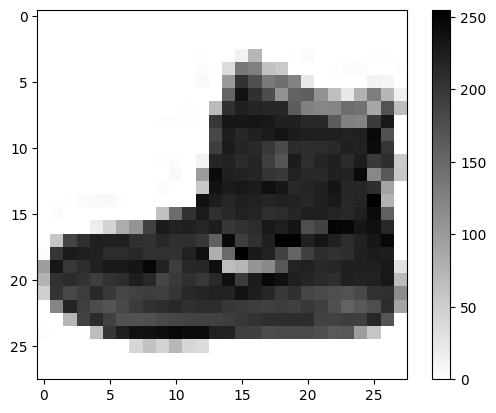

In [6]:
#这个代码必须是注释了上面的 transforms.ToTensor()才能够运行的
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary") # 显示图片
    plt.colorbar() # 显示颜色条
    plt.show()


show_single_image(img)

# 数据预处理

In [7]:
# 加载FashionMNIST数据集
from torchvision import datasets, transforms

# 定义数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),  # 将PIL图像或numpy数组转换为tensor,ToTensor会自动将图像转换为tensor，并归一化到[0,1]范围
    # transforms.Normalize((0.5,), (0.5,))  # 标准化到[-1, 1]范围
])

# 下载并加载训练集
train_dataset = datasets.FashionMNIST(
    root='./data',  # 数据存储路径
    train=True,     # 加载训练集
    download=True,  # 如果数据不存在则下载
    transform=transform
)

# 下载并加载测试集
test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,    # 加载测试集
    download=True,
    transform=transform
)

# 打印数据集信息
print(f"训练集大小: {len(train_dataset)}")
print(f"测试集大小: {len(test_dataset)}")
print(f"训练集数据类型: {type(train_dataset)}")
print(f"单个dataset元素类型: {type(train_dataset[0])}")
print(f"单个dataset元素是什么: {train_dataset[0]}")
print(f"图像尺寸: {train_dataset[0][0].shape}")
# lables在这个路径https://github.com/zalandoresearch/fashion-mnist
# FashionMNIST类别标签
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(f"类别数量: {len(class_names)}")
print(f"类别标签: {class_names}")


训练集大小: 60000
测试集大小: 10000
训练集数据类型: <class 'torchvision.datasets.mnist.FashionMNIST'>
单个dataset元素类型: <class 'tuple'>
单个dataset元素是什么: (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [8]:
print(train_dataset.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


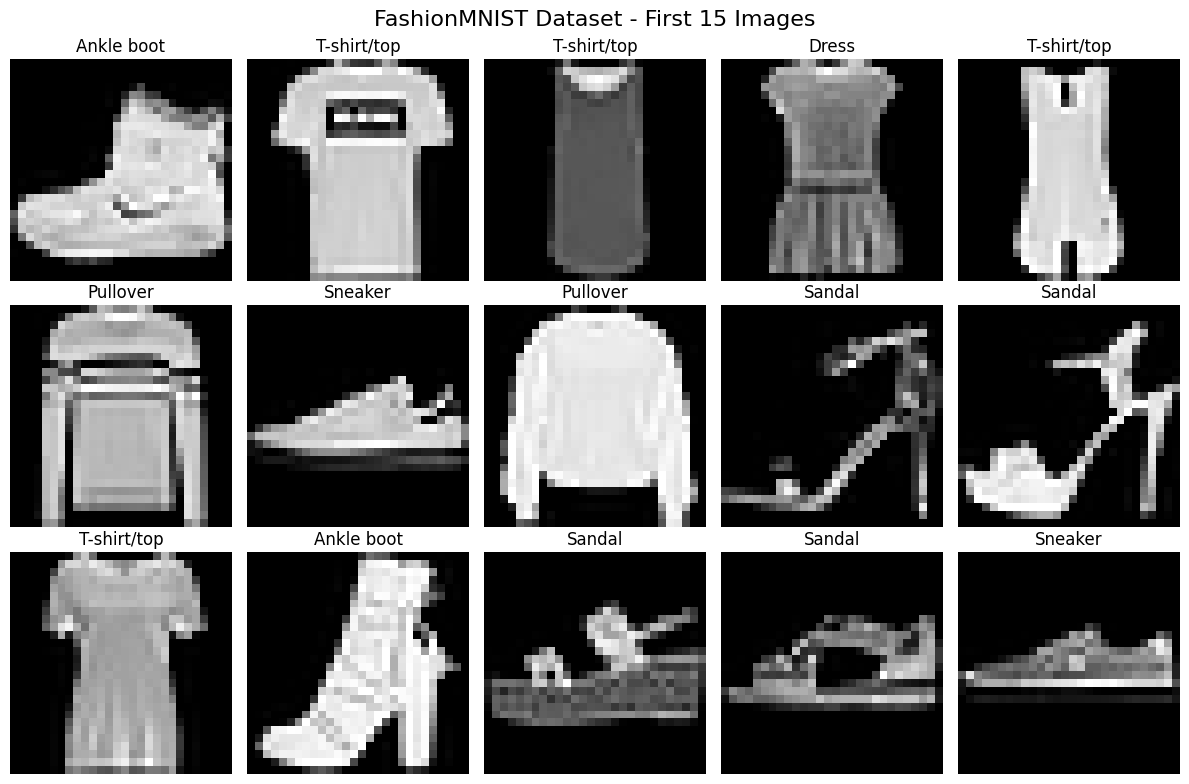

In [9]:
import matplotlib.pyplot as plt

# 显示前15张图片，每行5张，共3行
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
fig.suptitle('FashionMNIST Dataset - First 15 Images', fontsize=16)

for i in range(15):
    row = i // 5
    col = i % 5
    
    # 获取图像和标签
    image, label = train_dataset[i]
    
    # 将tensor转换为numpy数组并去掉通道维度
    image_np = image.squeeze().numpy()
    
    # 显示图像
    axes[row, col].imshow(image_np, cmap='gray')
    axes[row, col].set_title(f'{class_names[label]}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


In [10]:
from torch.utils.data import DataLoader

# 创建训练集和验证集的DataLoader
batch_size = 32

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,  # 训练时打乱数据
    num_workers=2  # 使用多进程加载数据
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,  # 测试时不需要打乱
    num_workers=2
)

print(f"训练集DataLoader批次数: {len(train_loader)}")
print(f"测试集DataLoader批次数: {len(test_loader)}")
print(f"每个批次大小: {batch_size}")

# 查看一个批次的数据
train_iter = iter(train_loader)
batch_images, batch_labels = next(train_iter)
print(f"批次图像张量形状: {batch_images.shape}")
print(f"批次标签张量形状: {batch_labels.shape}")
print(batch_labels)

训练集DataLoader批次数: 1875
测试集DataLoader批次数: 313
每个批次大小: 32
批次图像张量形状: torch.Size([32, 1, 28, 28])
批次标签张量形状: torch.Size([32])
tensor([0, 3, 5, 7, 0, 8, 1, 3, 6, 7, 2, 3, 2, 5, 9, 4, 0, 1, 6, 4, 7, 9, 9, 9,
        4, 9, 1, 4, 7, 0, 6, 1])


In [11]:
28*28

784

在PyTorch中，`DataLoader`是一个迭代器，它封装了数据的加载和预处理过程，使得在训练机器学习模型时可以方便地批量加载数据。`DataLoader`主要负责以下几个方面：

1. **批量加载数据**：`DataLoader`可以将数据集（Dataset）切分为更小的批次（batch），每次迭代提供一小批量数据，而不是单个数据点。这有助于模型学习数据中的统计依赖性，并且可以更高效地利用GPU等硬件的并行计算能力。

2. **数据打乱**：默认情况下，`DataLoader`会在每个epoch（训练周期）开始时打乱数据的顺序。这有助于模型训练时避免陷入局部最优解，并且可以提高模型的泛化能力。

3. **多线程数据加载**：`DataLoader`支持多线程（通过参数`num_workers`）来并行地加载数据，这可以显著减少训练过程中的等待时间，尤其是在处理大规模数据集时。

4. **数据预处理**：`DataLoader`可以与`transforms`结合使用，对加载的数据进行预处理，如归一化、标准化、数据增强等操作。

5. **内存管理**：`DataLoader`负责管理数据的内存使用，确保在训练过程中不会耗尽内存资源。

6. **易用性**：`DataLoader`提供了一个简单的接口，可以很容易地集成到训练循环中。

# 搭建模型

In [12]:
import torch.nn as nn

class TwoLayerNN(nn.Module):
    def __init__(self):
        super(TwoLayerNN, self).__init__()
        self.flatten = nn.Flatten() # 展平操作，将28*28的图像展平为784维的向量
        self.fc1 = nn.Linear(28*28, 300) # 全连接层，将784维的向量映射为300维的向量
        self.relu1 = nn.ReLU() # 激活函数，ReLU函数
        self.fc2 = nn.Linear(300, 100) # 全连接层，将300维的向量映射为100维的向量
        self.relu2 = nn.ReLU() # 激活函数，ReLU函数
        self.fc3 = nn.Linear(100, 10) # 全连接层，将100维的向量映射为10维的向量
        
    def forward(self, x):
        x = self.flatten(x)
        print(f"After Flatten: {x.shape}")
        x = self.fc1(x)
        print(f"After fc1: {x.shape}")
        x = self.relu1(x)
        print(f"After relu1: {x.shape}")
        x = self.fc2(x)
        print(f"After fc2: {x.shape}")
        x = self.relu2(x)
        print(f"After relu2: {x.shape}")
        x = self.fc3(x)
        print(f"After fc3: {x.shape}")
        return x

model = TwoLayerNN()
print(model)


TwoLayerNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=300, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=300, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [13]:
# 使用随机输入对模型进行一次前向计算以验证模型结构是否正确
import torch

dummy_input = torch.randn(32, 1, 28, 28)  # batch_size=1, channels=1, height=28, width=28
output = model(dummy_input) #前向传播/前向计算/正向传播
print(f"Output shape: {output.shape}")


After Flatten: torch.Size([32, 784])
After fc1: torch.Size([32, 300])
After relu1: torch.Size([32, 300])
After fc2: torch.Size([32, 100])
After relu2: torch.Size([32, 100])
After fc3: torch.Size([32, 10])
Output shape: torch.Size([32, 10])


In [14]:
# 输出model每一层的参数量
total_params = 0  # 初始化总参数量为0
print("各层参数量统计：")  # 打印参数统计表头
for name, param in model.named_parameters():  # 遍历模型中所有需要优化的参数
    if param.requires_grad:  # 只有需要梯度更新的参数才统计
        num_params = param.numel()  # 计算当前参数的元素总数
        total_params += num_params  # 更新总参数量
        print(f"{name}: {num_params}")  # 输出当前层的参数量
print(f"模型总参数量: {total_params}")  # 输出模型总参数量


各层参数量统计：
fc1.weight: 235200
fc1.bias: 300
fc2.weight: 30000
fc2.bias: 100
fc3.weight: 1000
fc3.bias: 10
模型总参数量: 266610


In [15]:
import torch.nn as nn

class TwoLayerNN(nn.Module):
    def __init__(self):
        super(TwoLayerNN, self).__init__()
        self.flatten = nn.Flatten() # 展平操作，将28*28的图像展平为784维的向量
        self.fc1 = nn.Linear(28*28, 300) # 全连接层，将784维的向量映射为300维的向量
        self.relu1 = nn.ReLU() # 激活函数，ReLU函数
        self.fc2 = nn.Linear(300, 100) # 全连接层，将300维的向量映射为100维的向量
        self.relu2 = nn.ReLU() # 激活函数，ReLU函数
        self.fc3 = nn.Linear(100, 10) # 全连接层，将100维的向量映射为10维的向量
        
    def forward(self, x):
        x = self.flatten(x)

        x = self.fc1(x)

        x = self.relu1(x)

        x = self.fc2(x)

        x = self.relu2(x)

        x = self.fc3(x)

        return x

model = TwoLayerNN()
print(model)


TwoLayerNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=300, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=300, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


# 训练

In [16]:
import torch.nn as nn
import torch.optim as optim

# 初始化交叉熵损失函数，内部会做softmax
criterion = nn.CrossEntropyLoss()

# 初始化优化器（这里选用Adam，也可以使用SGD等）
optimizer = optim.SGD(model.parameters(), lr=0.001)


In [ ]:
import wangdao_train
# 假设train_loader和val_loader已定义，device已经设为"cuda"或"cpu"
trainer = wangdao_train.Trainer(
    model=model,
    train_loader=train_loader,
    val_loader=test_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device
)

# 设定训练轮数
num_epochs = 20

# 开始训练
# trainer.train(num_epochs)


[Step 100] Val Loss: 2.3009 Val Acc: 0.1153
[Step 200] Val Loss: 2.2890 Val Acc: 0.1529
[Step 300] Val Loss: 2.2776 Val Acc: 0.1571
[Step 400] Val Loss: 2.2661 Val Acc: 0.1620
[Step 500] Val Loss: 2.2550 Val Acc: 0.1666
[Step 600] Val Loss: 2.2431 Val Acc: 0.1735
[Step 700] Val Loss: 2.2310 Val Acc: 0.1879
[Step 800] Val Loss: 2.2182 Val Acc: 0.2138
[Step 900] Val Loss: 2.2045 Val Acc: 0.2656
[Step 1000] Val Loss: 2.1898 Val Acc: 0.2980
[Step 1100] Val Loss: 2.1736 Val Acc: 0.3138
[Step 1200] Val Loss: 2.1564 Val Acc: 0.3292
[Step 1300] Val Loss: 2.1380 Val Acc: 0.3391
[Step 1400] Val Loss: 2.1178 Val Acc: 0.3537
[Step 1500] Val Loss: 2.0957 Val Acc: 0.3481
[Step 1600] Val Loss: 2.0724 Val Acc: 0.3412
[Step 1700] Val Loss: 2.0478 Val Acc: 0.3545
[Step 1800] Val Loss: 2.0215 Val Acc: 0.3696
Epoch [1/20]  Train Loss: 2.1836  Train Acc: 0.2594
[Step 1900] Val Loss: 1.9932 Val Acc: 0.3800
[Step 2000] Val Loss: 1.9637 Val Acc: 0.3880
[Step 2100] Val Loss: 1.9325 Val Acc: 0.3958
[Step 2200] 

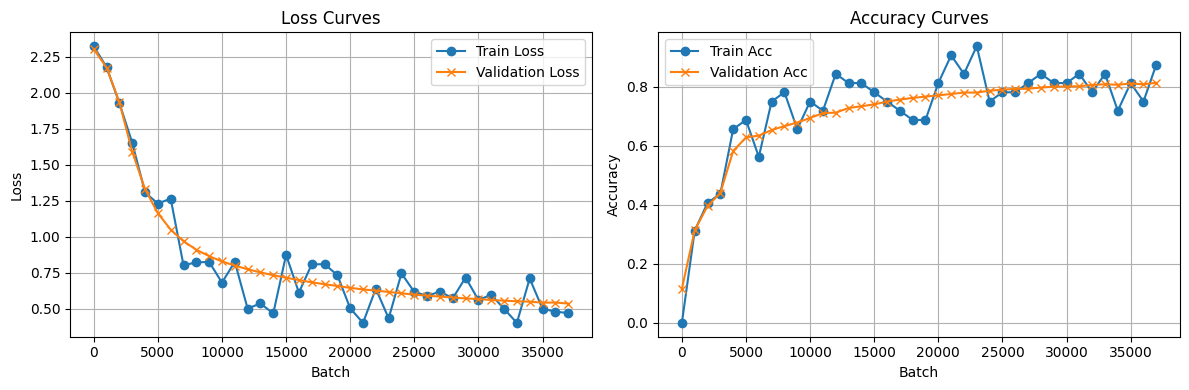

In [ ]:
# trainer.plot_curves()


# 标准化后重新初始化一个模型对象，训练对象

In [1]:
# 加载FashionMNIST数据集
from torchvision import datasets, transforms

# 定义数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),  # 将PIL图像或numpy数组转换为tensor,ToTensor会自动将图像转换为tensor，并归一化到[0,1]范围
    transforms.Normalize((0.2860,), (0.3205,))  # 标准化到[-1, 1]范围
])

# 下载并加载训练集
train_dataset = datasets.FashionMNIST(
    root='./data',  # 数据存储路径
    train=True,     # 加载训练集
    download=True,  # 如果数据不存在则下载
    transform=transform
)

# 下载并加载测试集
test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,    # 加载测试集
    download=True,
    transform=transform
)

# 打印数据集信息
print(f"训练集大小: {len(train_dataset)}")
print(f"测试集大小: {len(test_dataset)}")

# lables在这个路径https://github.com/zalandoresearch/fashion-mnist
# FashionMNIST类别标签
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(f"类别数量: {len(class_names)}")
print(f"类别标签: {class_names}")


训练集大小: 60000
测试集大小: 10000
类别数量: 10
类别标签: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [2]:
import torch  # 导入PyTorch库

# 计算整个训练集的均值和标准差
loader = torch.utils.data.DataLoader(train_dataset, batch_size=5000, shuffle=False, num_workers=0)  # 构建数据加载器，一次加载5000张图片
n_samples = 0  # 初始化样本数量
mean = 0.0     # 初始化均值
std = 0.0      # 初始化标准差

for images, _ in loader:  # 遍历数据加载器，每个batch返回(images, labels)
    # images: [batch_size, 1, 28, 28]
    batch_samples = images.size(0)  # 当前batch的图片张数
    images = images.view(batch_samples, -1)  # 展平图片为二维，方便计算，[batch_size, 784]
    mean += images.mean(1).sum()    # 计算每张图片的均值后求和，累加到总均值
    std += images.std(1).sum()      # 计算每张图片的标准差后求和，累加到总标准差
    n_samples += batch_samples      # 累加样本数量

mean /= n_samples  # 求所有图片均值的均值
std /= n_samples   # 求所有图片标准差的均值

print(f"训练集均值: {mean.item():.4f}")      # 打印训练集的均值
print(f"训练集标准差: {std.item():.4f}")     # 打印训练集的标准差


训练集均值: 0.0001
训练集标准差: 0.9999


In [3]:
from torch.utils.data import DataLoader

# 创建训练集和验证集的DataLoader
batch_size = 32

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,  # 训练时打乱数据
    num_workers=2  # 使用多进程加载数据
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,  # 测试时不需要打乱
    num_workers=2
)

In [4]:
import torch.nn as nn

class TwoLayerNN(nn.Module):
    def __init__(self):
        super(TwoLayerNN, self).__init__()
        self.flatten = nn.Flatten() # 展平操作，将28*28的图像展平为784维的向量
        self.fc1 = nn.Linear(28*28, 300) # 全连接层，将784维的向量映射为300维的向量
        self.relu1 = nn.ReLU() # 激活函数，ReLU函数
        self.fc2 = nn.Linear(300, 100) # 全连接层，将300维的向量映射为100维的向量
        self.relu2 = nn.ReLU() # 激活函数，ReLU函数
        self.fc3 = nn.Linear(100, 10) # 全连接层，将100维的向量映射为10维的向量
        
    def forward(self, x):
        x = self.flatten(x)

        x = self.fc1(x)

        x = self.relu1(x)

        x = self.fc2(x)

        x = self.relu2(x)

        x = self.fc3(x)

        return x

model_normalize = TwoLayerNN()
print(model_normalize)


TwoLayerNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=300, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=300, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [5]:
model_normalize.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.0315, -0.0098,  0.0120,  ...,  0.0053,  0.0282, -0.0135],
                      [ 0.0083, -0.0267, -0.0110,  ...,  0.0085, -0.0292, -0.0134],
                      [-0.0276,  0.0193,  0.0297,  ..., -0.0084,  0.0249,  0.0020],
                      ...,
                      [ 0.0117,  0.0191,  0.0001,  ...,  0.0259,  0.0312,  0.0048],
                      [-0.0081, -0.0028, -0.0354,  ...,  0.0033,  0.0056,  0.0155],
                      [-0.0328,  0.0238,  0.0273,  ..., -0.0235,  0.0239, -0.0335]])),
             ('fc1.bias',
              tensor([ 0.0187, -0.0290, -0.0064, -0.0247,  0.0056, -0.0342, -0.0127, -0.0304,
                       0.0294, -0.0163, -0.0348, -0.0037, -0.0041, -0.0114, -0.0085, -0.0055,
                      -0.0216,  0.0064, -0.0209,  0.0294,  0.0119,  0.0283, -0.0266, -0.0022,
                       0.0069,  0.0307, -0.0109,  0.0049,  0.0216,  0.0088,  0.0322,  0.0308,
                      -0.0287, -0.01

In [6]:
import torch.nn as nn
import torch.optim as optim

# 初始化交叉熵损失函数，内部会做softmax
criterion = nn.CrossEntropyLoss()

# 初始化优化器（这里选用Adam，也可以使用SGD等）
optimizer_normalize = optim.SGD(model_normalize.parameters(), lr=0.001)

In [ ]:
import wangdao_train
# 强制重新加载模块
import importlib
importlib.reload(wangdao_train)

# 初始化早停对象
early_stopping = wangdao_train.EarlyStopping(patience=5, min_delta=0.01, mode='max')

# 初始化模型保存对象
model_checkpoint = wangdao_train.ModelCheckpoint(
    filepath='./checkpoints/fashion_model_epoch_{epoch}.pt',
    monitor='val_acc',
    save_best_only=True,
    mode='max',
    min_delta=0.01
)

# 初始化TensorBoard对象
tensorboard_callback = wangdao_train.TensorBoardCallback(log_dir='./logs')
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
# 假设train_loader和val_loader已定义，device已经设为"cuda"或"cpu"
trainer_normalize = wangdao_train.Trainer(
    model=model_normalize,
    train_loader=train_loader,
    val_loader=test_loader,
    criterion=criterion,
    optimizer=optimizer_normalize,
    device=device,
    eval_step=500,
    early_stopping=early_stopping,
    model_checkpoint=model_checkpoint,
    tensorboard_callback=tensorboard_callback
)

# 设定训练轮数
num_epochs = 100

# 开始训练
trainer_normalize.train(num_epochs)


[Step 500] Val Loss: 0.8444 Val Acc: 0.7264
[Step 1000] Val Loss: 0.7796 Val Acc: 0.7352
[Step 1500] Val Loss: 0.7344 Val Acc: 0.7440
Epoch [1/100]  Train Loss: 0.7863  Train Acc: 0.7415
[Step 2000] Val Loss: 0.7008 Val Acc: 0.7533
[Step 2500] Val Loss: 0.6731 Val Acc: 0.7615
[Step 3000] Val Loss: 0.6532 Val Acc: 0.7674
[Step 3500] Val Loss: 0.6360 Val Acc: 0.7722
Epoch [2/100]  Train Loss: 0.6464  Train Acc: 0.7730
[Step 4000] Val Loss: 0.6211 Val Acc: 0.7753
[Step 4500] Val Loss: 0.6071 Val Acc: 0.7796
[Step 5000] Val Loss: 0.5939 Val Acc: 0.7838
[Step 5500] Val Loss: 0.5841 Val Acc: 0.7872
Epoch [3/100]  Train Loss: 0.5833  Train Acc: 0.7931
[Step 6000] Val Loss: 0.5744 Val Acc: 0.7929
[Step 6500] Val Loss: 0.5671 Val Acc: 0.7936
[Step 7000] Val Loss: 0.5588 Val Acc: 0.7970
[Step 7500] Val Loss: 0.5523 Val Acc: 0.7991
Epoch [4/100]  Train Loss: 0.5444  Train Acc: 0.8070
[Step 8000] Val Loss: 0.5451 Val Acc: 0.8027
[Step 8500] Val Loss: 0.5389 Val Acc: 0.8041
[Step 9000] Val Loss: 0.

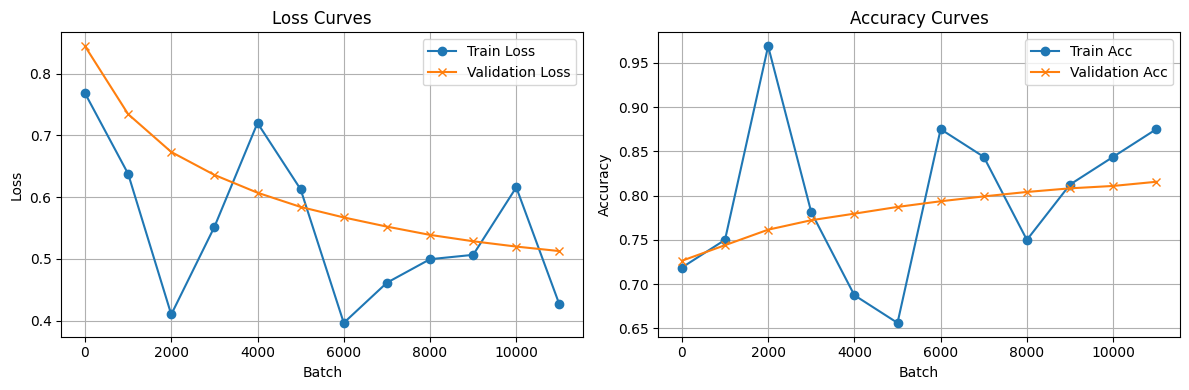

In [14]:
trainer_normalize.plot_curves()

In [15]:
model_normalize=TwoLayerNN()
# 加载最佳模型权重
best_model_path = 'checkpoints/best_model.ckpt'
if best_model_path and os.path.exists(best_model_path):
    print(f"Loading best model from: {best_model_path}")
    model_normalize.load_state_dict(torch.load(best_model_path, map_location=device))
else:
    print("No best model found, using current model weights")

# 设置模型为评估模式
model_normalize.eval()

# 在测试集上计算损失和准确率
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        
        # 前向传播
        output = model_normalize(data)
        
        # 计算损失
        loss = criterion(output, target)
        test_loss += loss.item()
        
        # 计算准确率
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

# 计算平均损失和准确率
avg_test_loss = test_loss / len(test_loader)
test_accuracy = 100 * correct / total

print(f"Test Loss: {avg_test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Loading best model from: checkpoints/best_model.ckpt
Test Loss: 0.5282
Test Accuracy: 80.82%
